<a href="https://colab.research.google.com/github/ravellys/PID/blob/master/Lista6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade \#6 - Uso de operações lógicas e de operações aritméticas
---
## Universidade Federal de Pernambuco - Departamento de Energia Nuclear
## Processamento de Imagens Digitais
### Aluno - Lucas Ravellys
---

In [18]:
# Importando bibliotecas
import skimage as sk
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os
from matplotlib import image
import cv2

In [19]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# Plotagem Imagem + Histograma
from skimage import exposure

def plot_im_hist(im, bits = 8):
  fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
  ax = axes.ravel()
  ax_cdf = ax[1].twinx()

  ax[0].imshow(im, cmap='gray', vmin =  0, vmax = 2**bits-1)
  ax[0].set_title('Image')
  ax[0].axis('off')

  ax[1].hist(im.ravel(), bins=(im.max()-im.min()), range = (0,  2**bits-1), density = True)
  ax[1].set_title('Histogram')

  img_cdf, bins = exposure.cumulative_distribution(im, nbins = 2**bits )
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  ax[1].grid(True)
  plt.show()

def plot_comp_image(ncols, *images): 
  n_images = len(images)

  fig, ax = plt.subplots(ncols = ncols, nrows = round(n_images/ncols), figsize = (12,5))
  ax = ax.ravel()

  for ax_,img in zip(ax,images): 
    ax_.imshow(img,"gray", vmin =  0, vmax = 255)

#altera range dos tons de cinza
def im_alt_range(im, n_min, n_max ):
  min = im.min()
  max = im.max()
  im_ = n_min +(im - min)*(n_max - n_min)/(max - min)
  return im_.astype(int)   
 

# 1. Operações Lógicas: 



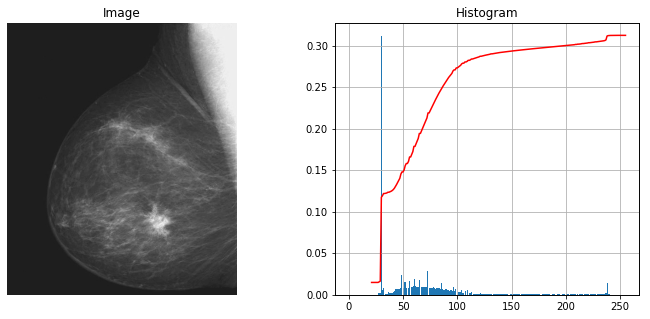

In [93]:
from skimage import io
file_ = "/content/drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 6/images/Seio.png"
im_seio = (io.imread(file_,as_gray=True)*255).astype(int)
plot_im_hist(im_seio)

##a) Obtenha a imagem NOT de da imagem Seio.png, disponível na aula 08.

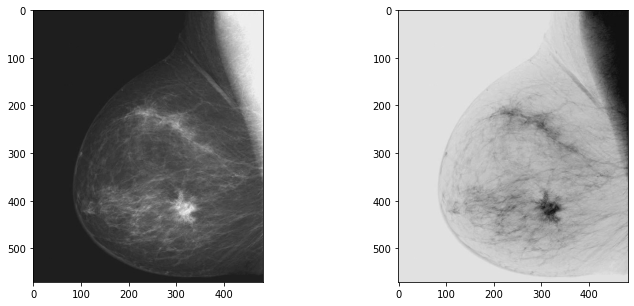

In [94]:
im_seio_not = 255 - im_seio

plot_comp_image(2, im_seio, im_seio_not)

##b) Reproduza imagens similares às dos slides da aula 08, quando utilizamos as operações AND e OR sobre a imagem NOT de Seio.png.

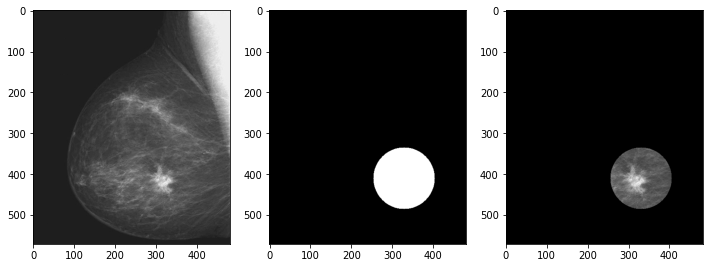

In [95]:
# Load image, create mask, and draw white circle on mask
mask = np.zeros(im_seio.shape, dtype=np.uint8)
mask = cv2.circle(mask, (330, 410), 75, (255,255,255), -1) 

result = im_seio.copy()
result[mask == 0] = 0
result[mask != 0] = im_seio[mask != 0]

plot_comp_image(3, im_seio, mask, result)

##c) Obtenha uma imagem médica monocromática mostrando uma lesão (ou tumor) e repita os itens a e b para esta imagem.

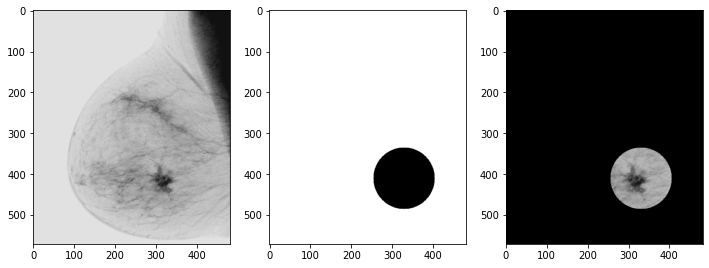

In [96]:
# Load image, create mask, and draw white circle on mask
mask = np.zeros(im_seio_not.shape, dtype=np.uint8)
mask = 255 - cv2.circle(mask, (330, 410), 75, (255,255,255), -1) 

result = im_seio_not.copy()
result[mask != 0] = 0
result[mask == 0] = im_seio_not[mask == 0]

plot_comp_image(3, im_seio_not, mask, result)

##d) Obtenha uma imagem de medicina nuclear contendo ROIs (áreas quentes) e repita os itens a e b para cada ROI.

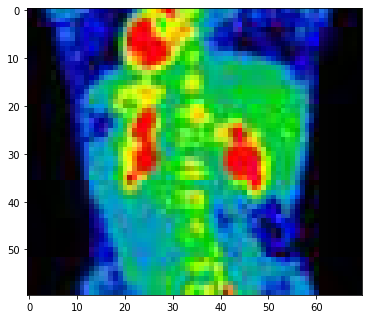

In [173]:
from urllib.request import urlopen
from PIL import Image
from skimage import color

url = "https://www.vitaimagem.com.br/wp-content/uploads/2019/10/medicina-nuclear-pet-scan.jpg"

img = Image.open(urlopen(url))

im_1d = np.array(img)
im_1d = im_1d[60:120,195:265]

plt.subplots(figsize = (6,7))
plt.imshow(im_1d)
plt.show()

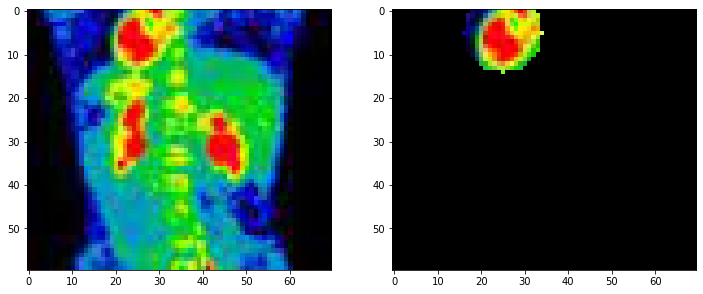

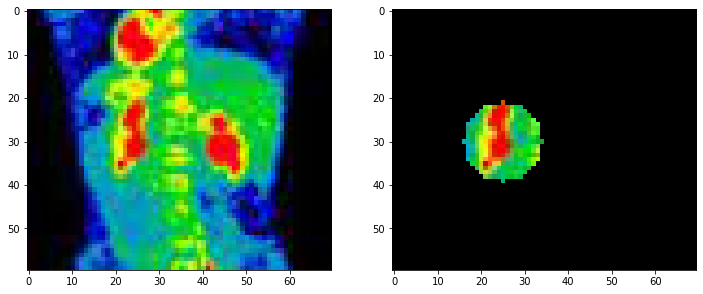

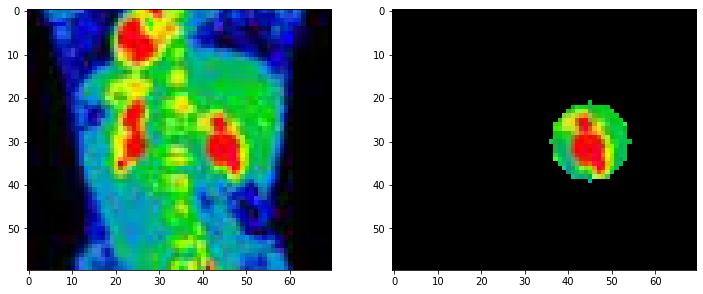

In [180]:
def select_from_mask(im, posx, posy, radius = 15 ):
  mask = np.zeros(im.shape, dtype=np.uint8)
  mask = cv2.circle(mask, (posy,posx), radius, (255,255,255), -1) 
  result = im.copy()
  result[mask == 0] = 0
  result[mask != 0] = im[mask != 0]
  return result

posx = 5
posy = 25
im_result1d_1 = select_from_mask(im_1d, posx, posy,9)
plot_comp_image(2, im_1d, im_result1d_1)

posx = 30
posy = 25
im_result1d_2 = select_from_mask(im_1d, posx, posy,9)
plot_comp_image(2, im_1d, im_result1d_2)

posx = 30
posy = 45
im_result1d_3 = select_from_mask(im_1d, posx, posy,9)
plot_comp_image(2, im_1d, im_result1d_3)

## 2) Operações Aritméticas: 

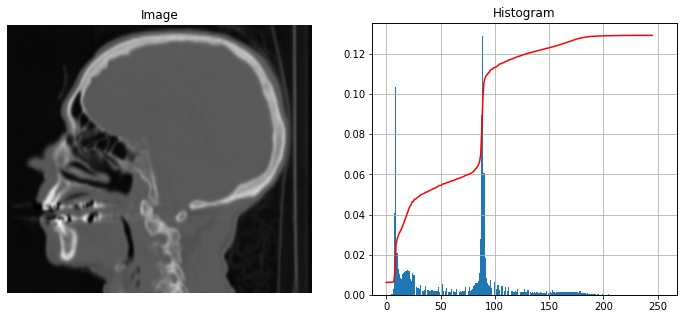

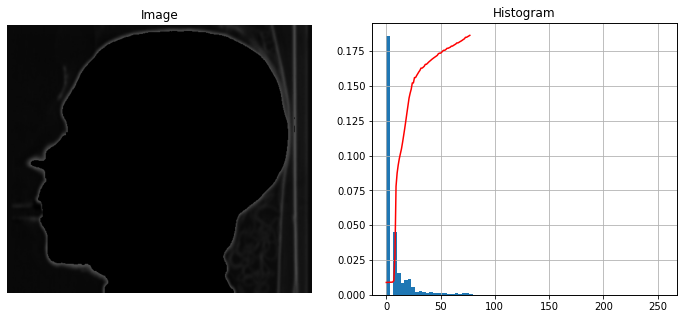

In [112]:
# importando imagens
from skimage import io
file_ = "/content/drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 6/images/CT_Sagital.jpg"
im_ctsag = (io.imread(file_,as_gray=True)*255).astype(int)
plot_im_hist(im_ctsag)

file_ = "/content/drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 6/images/Artefato.jpg"
im_art = (io.imread(file_,as_gray=True)*255).astype(int)
plot_im_hist(im_art)

### a) Subtraia da imagem CT_Sagital.jpg a imagem Artefato.jpg, disponíveis na aula 08, salve e comente o resultado obtido. 

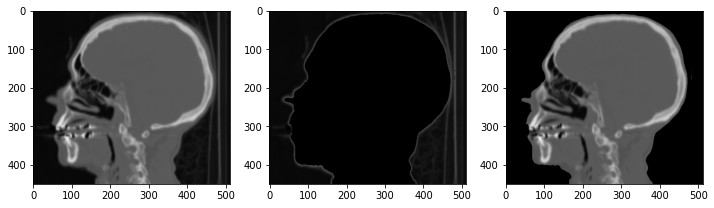

In [113]:
im_result2a = im_ctsag - im_art
plot_comp_image(3, im_ctsag, im_art, im_result2a)

é possível observar que na imagem foi apenas selecionado o crânio e removido o fundo. 

### b) Use a imagem resultante do item 2-a e a multiplique por ela mesma. Salve e comente o resultado. 

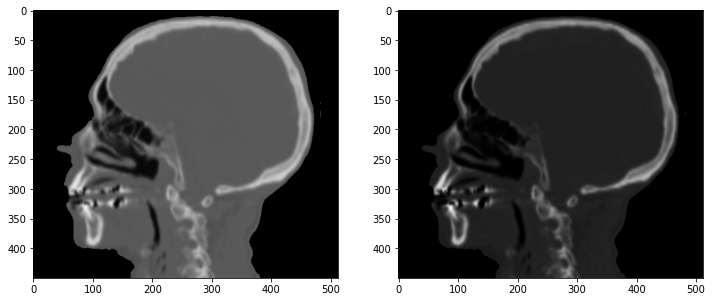

In [114]:
im_result2b = im_result2a*im_result2a
im_result2b = im_alt_range(im_result2b, n_min = 0, n_max = 255)

plot_comp_image(2, im_result2a, im_result2b)

para essa operação foi necessário normalizar a imagens para tons de cinza no range de 0 a 255. Após isso, observa-se que os pixeis mais escuros ficaram mais escuros e os mais claros mais claros. Isso ocorre porque essa operação é analoga a realizar a transformação gamma, com c=1 e gamma=2, seguida de uma normalização.



## c) Adicione as imagens resultantes dos itens a e b. Salve e comente o resultado. 

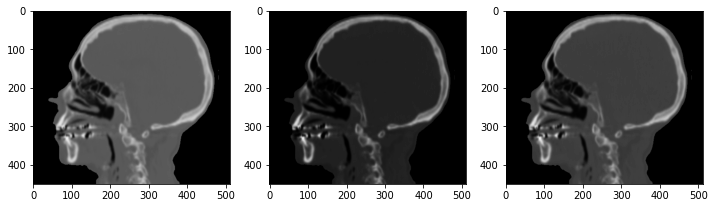

In [115]:
im_result2c = im_result2a + im_result2b
im_result2c = im_alt_range(im_result2c, n_min = 0, n_max = 255)

plot_comp_image(3, im_result2a, im_result2b, im_result2c )

para essa operação foi necessário normalizar a imagem para tons de cinza no range de 0 a 255. Após isso, observa-se que os pixeis ficaram mais claros que a imagem2a e mais escuros que a imagem2b.

### d) Use outras técnicas já implementadas no seu DIP para eliminar os artefatos da imagem CT_Sagital.jpg original, definir o fundo da imagem como 0 e expandir o intervalo dinâmico. Use a sequência de transformações que achar mais apropriada e comente cada passo.

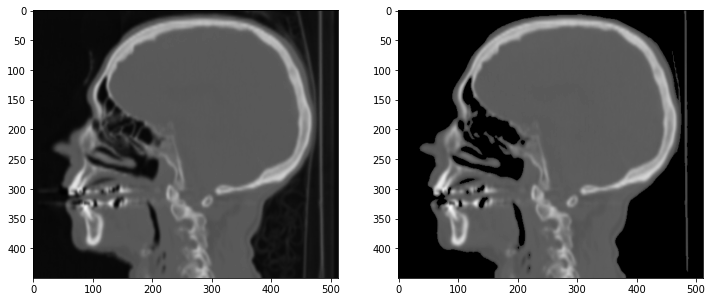

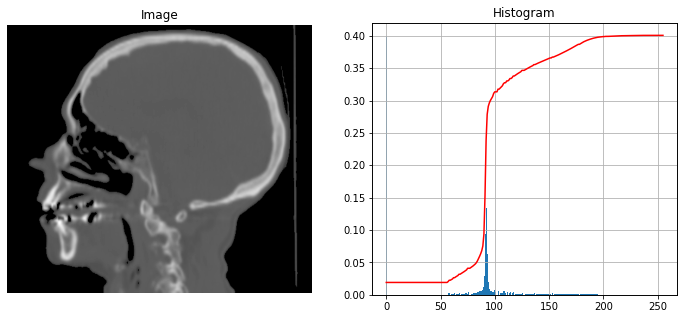

In [126]:
# cria a imagem resultado da questão 2d
im_result2d = im_ctsag.copy()
# selecionando os pixeis acima de 75 e abaixo disso igua-la a zero
im_result2d[im_ctsag<55] = 0
# redimentiona intervalo
im_result2d = im_alt_range(im_result2d, n_min = 0, n_max = 255)

plot_comp_image(2,im_ctsag,im_result2d)
plot_im_hist(im_result2d)

## 3) Operações Aritméticas: Adicione as imagens das ROIs cortadas em 1-d em uma única imagem.

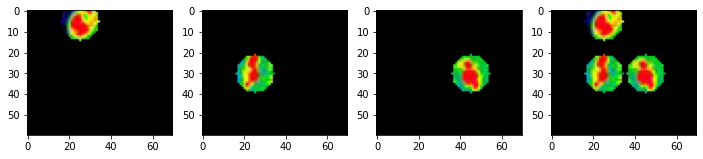

In [183]:
im_result_3 = im_result1d_1 + im_result1d_2 + im_result1d_3

plot_comp_image (4, im_result1d_1, im_result1d_2, im_result1d_3, im_result_3)